In [192]:
# Regular libraries for data manipulation
import pprint
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Visualization
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tools for time series analysis
from scipy import signal
import statsmodels.api as sm
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

from pylab import rcParams

In [193]:
#import data
data = pd.read_csv('/Users/martius/Documents/thesis/CAC40_stocks_2010_2021.csv')
data.head()

,CompanyName,StockName,High,Low,Open,Close,Volume,Date
0,TechnipFMC,FTI,29.855000,29.075001,29.075001,29.615000,1908400,2010-01-04
1,TechnipFMC,FTI,30.270000,29.555000,29.610001,30.125000,2206600,2010-01-05
2,TechnipFMC,FTI,30.305000,29.434999,30.040001,30.264999,2724200,2010-01-06
3,TechnipFMC,FTI,30.219999,29.715000,30.155001,29.915001,2581000,2010-01-07
4,TechnipFMC,FTI,30.500000,29.625000,29.830000,30.450001,3280400,2010-01-08


In [194]:
#filter the dataframe on LVMH stock
#Moët Hennessy Louis Vuitton, commonly known as LVMH, is a French multinational holding and conglomerate specializing in luxury goods, headquartered in Paris.
df = data[data['CompanyName'] == 'LVMH'].copy()
df.head(20)

,CompanyName,StockName,High,Low,Open,Close,Volume,Date
80024,LVMH,MC,27.219999,26.000000,27.000000,26.150000,4441800,2014-04-16
80025,LVMH,MC,26.230000,25.959999,26.230000,26.090000,299300,2014-04-17
80026,LVMH,MC,26.261000,25.750000,26.139999,25.950001,142400,2014-04-21
80027,LVMH,MC,26.290001,25.870001,26.000000,26.250000,365700,2014-04-22
80028,LVMH,MC,26.940001,25.900000,26.090000,26.879999,158800,2014-04-23
80029,LVMH,MC,27.790001,26.410000,27.000000,27.770000,104400,2014-04-24
80030,LVMH,MC,27.799999,26.799999,27.700001,26.959999,140300,2014-04-25
80031,LVMH,MC,27.424999,26.510000,26.870001,27.000000,111500,2014-04-28
80032,LVMH,MC,27.000000,26.410000,27.000000,26.950001,57600,2014-04-29
80033,LVMH,MC,26.900000,26.559999,26.900000,26.559999,154300,2014-04-30


In [195]:
#convert date to datetime object
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.tail(20)

,CompanyName,StockName,High,Low,Open,Close,Volume,Date,Year,Month
81715,LVMH,MC,47.320000,45.380001,47.320000,45.930000,324400,2021-01-04,2021,1
81716,LVMH,MC,47.224998,46.220001,46.860001,46.240002,443000,2021-01-05,2021,1
81717,LVMH,MC,50.279999,46.740002,47.110001,49.830002,843700,2021-01-06,2021,1
81718,LVMH,MC,52.290001,50.549999,51.130001,51.810001,544700,2021-01-07,2021,1
81719,LVMH,MC,52.470001,50.419998,51.970001,51.310001,412000,2021-01-08,2021,1
81720,LVMH,MC,52.639999,51.049999,51.049999,52.330002,416500,2021-01-11,2021,1
81721,LVMH,MC,53.860001,52.180000,52.799999,52.910000,558200,2021-01-12,2021,1
81722,LVMH,MC,53.270000,52.130001,52.700001,53.049999,268200,2021-01-13,2021,1
81723,LVMH,MC,55.290001,53.325001,53.549999,54.490002,400000,2021-01-14,2021,1
81724,LVMH,MC,55.279999,53.349998,53.680000,55.189999,420500,2021-01-15,2021,1


In [196]:
df.shape

(1711, 10)

1. Line plot of observations

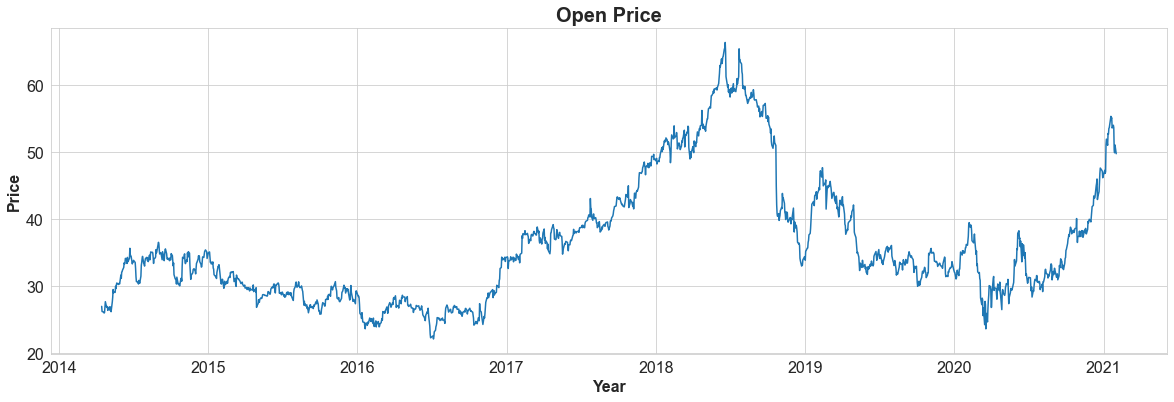

In [197]:
# Line plot
fig, ax = plt.subplots(figsize = (20, 6))
sns.lineplot(df['Date'], df['Open'])

#Formating
ax.set_title('Open Price', fontsize = 20, loc='center', fontdict = dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict = dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict = dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

Comment:
1. Upward trend from 2017 to 2018. Highest prices are from mid 2018.
2. The price felt sharply from mid 2018 to 2019. (reason?) The sudden fall from early 2020 is likely due to the COVID19. Recovery is happening strongly.

2. Treatment of NA

In [198]:
#NA check
df.isna().sum()
#there is no NA value

CompanyName    0
StockName      0
High           0
Low            0
Open           0
Close          0
Volume         0
Date           0
Year           0
Month          0
dtype: int64

In [199]:
#convert object to numeric
df['Open'] = pd.to_numeric(df['Open'])
df['Close'] = pd.to_numeric(df['Close'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])
df['Volume'] = df['Volume'].astype(float)
df['Volume'].dtypes

dtype('float64')

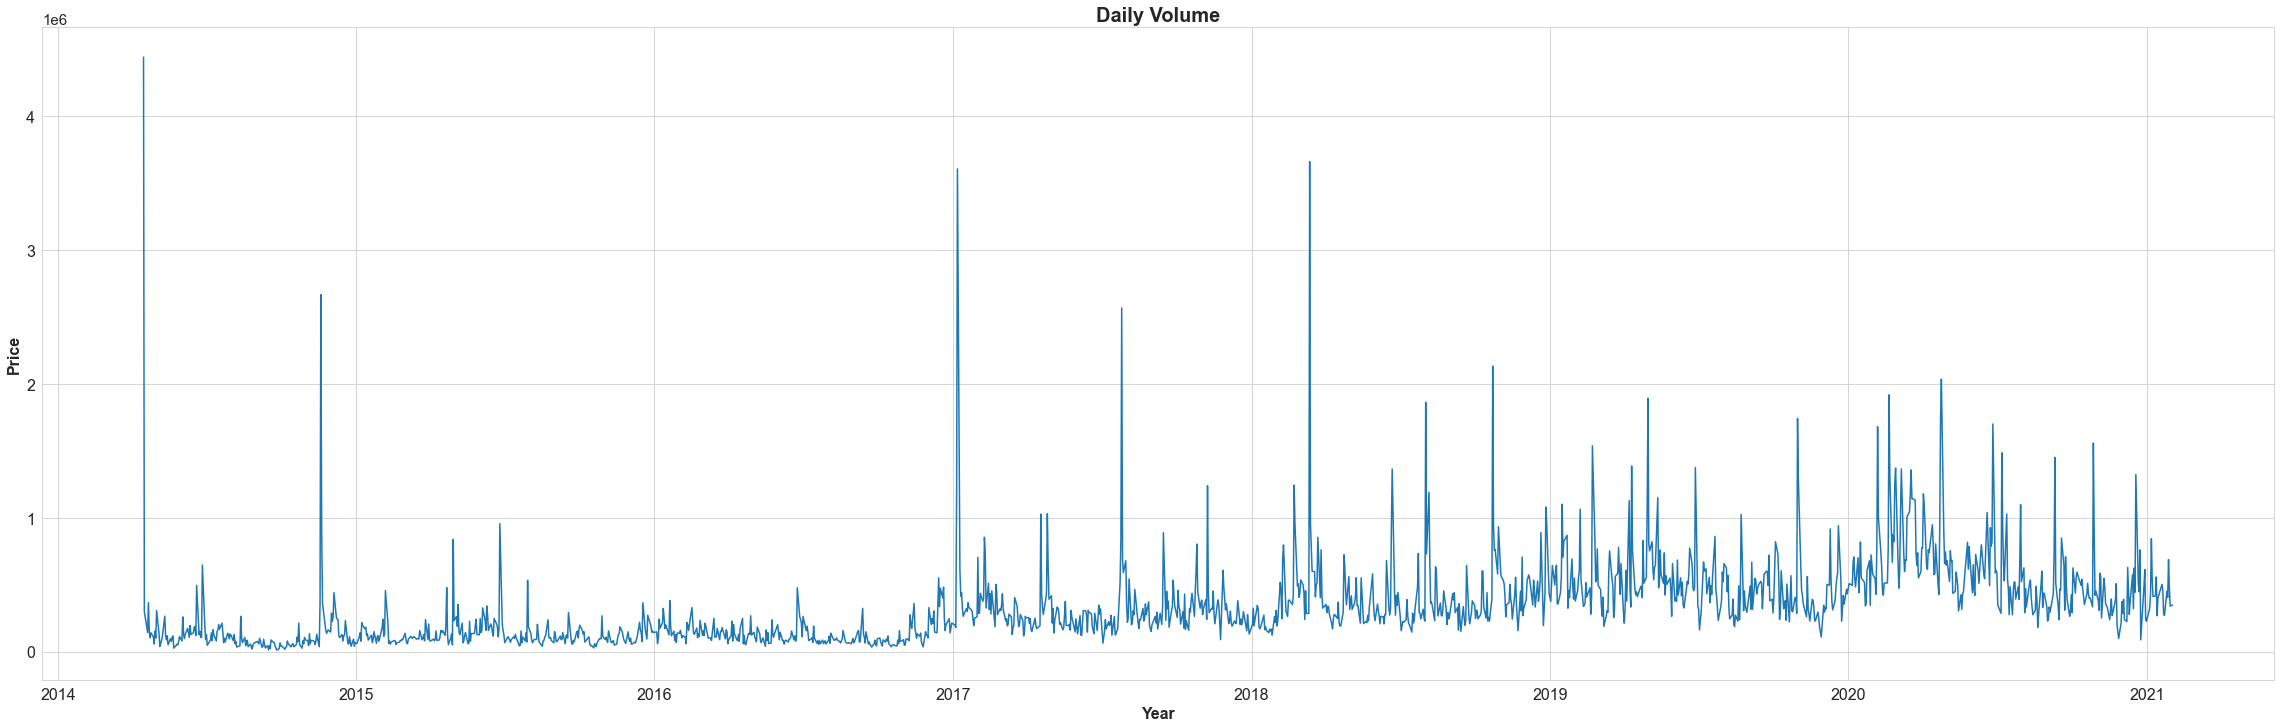

In [200]:
#plot daily volume lineplot
fig, ax = plt.subplots(figsize=(40, 12))
sns.lineplot(df['Date'], df['Volume'])

ax.set_title('Daily Volume', fontsize=20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize=16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

Daily scaled index results in a lot of noise. => Choosing the mean of volume traded per month.

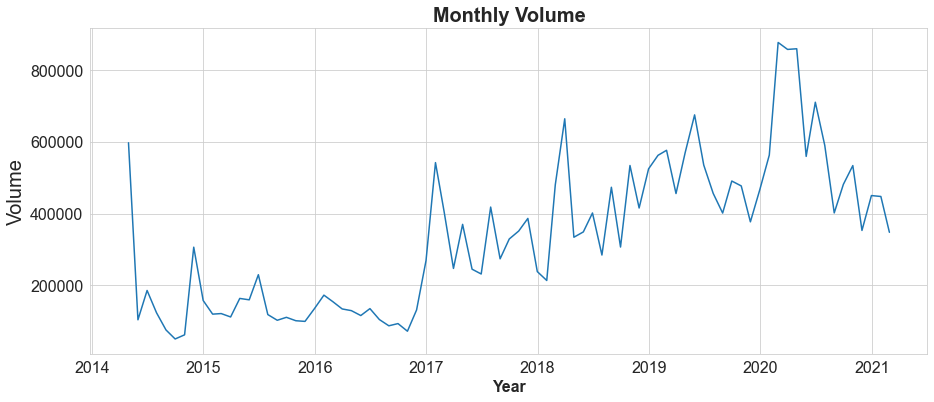

In [201]:
#Aggregating the Time Series to a monthly scaled index
y = df[['Date', 'Volume']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()
y['Date'] = y.index

#Plot the monthly volume lineplot
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(y['Date'], y['Volume'])

ax.set_title('Monthly Volume', fontsize=20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

3. Seasonality

In [202]:
df['Year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

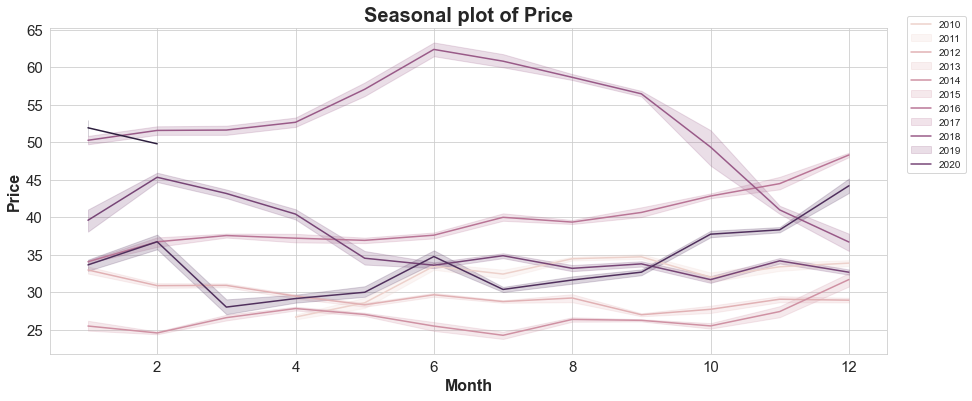

In [203]:
variable = 'Open'
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(df['Month'], df[variable], hue = df['Year'])
ax.set_title('Seasonal plot of Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
ax.legend(labels = [str(2010+i) for i in range(11)], bbox_to_anchor=(1.1, 1.05))


No seasonality. 2018 is the best year of the firm.

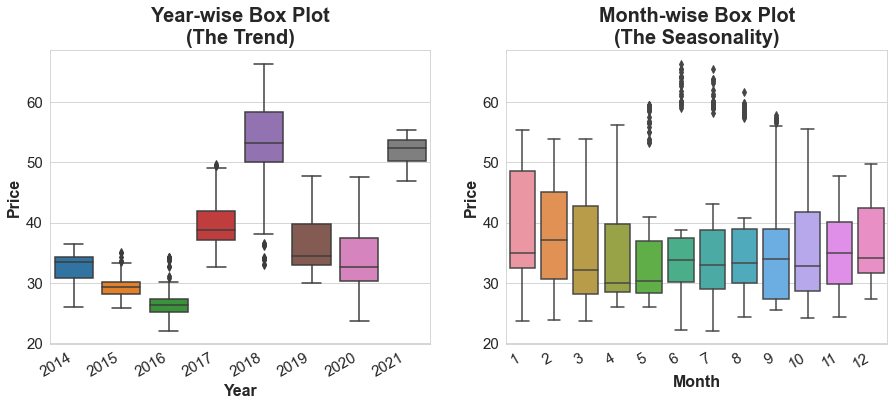

In [204]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(df['Year'], df[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(df['Month'], df[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

fig.autofmt_xdate()

Text(0, 0.5, 'Close')

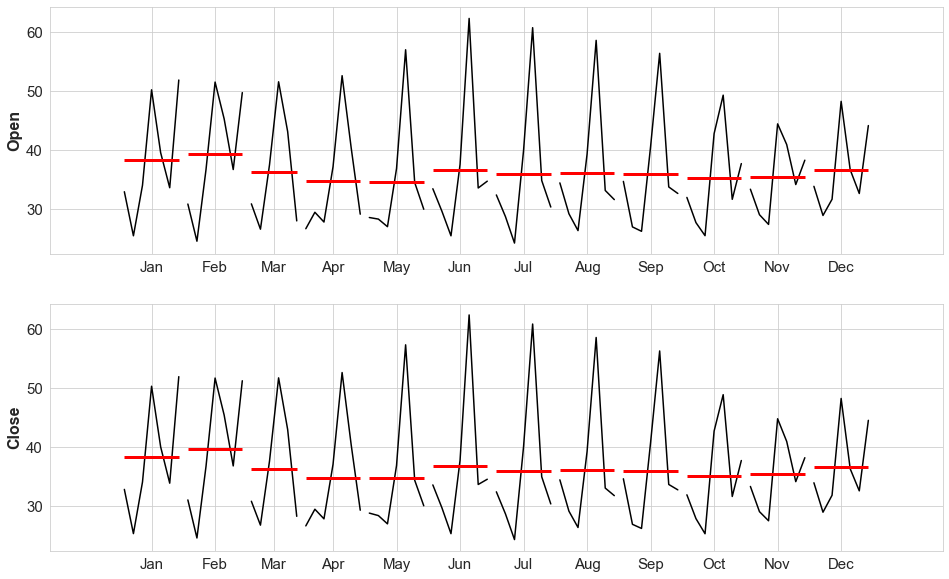

In [205]:
# Aggregating the Time Series to a monthly scaled index
y = df[['Date','Open','Close']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# The magic
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

month_plot(y['Open'], ax=ax[0]);
ax[0].set_ylabel('Open', fontsize = 16, fontdict=dict(weight='bold'))

month_plot(y['Close'], ax=ax[1]);
ax[1].set_ylabel('Close', fontsize = 16, fontdict=dict(weight='bold'))

The mean of 8 years LVMH open and closing price per month is quite the same. => No seasonality.

4. Time Series Components

Text(0.5, 0.98, 'Open decomposition')

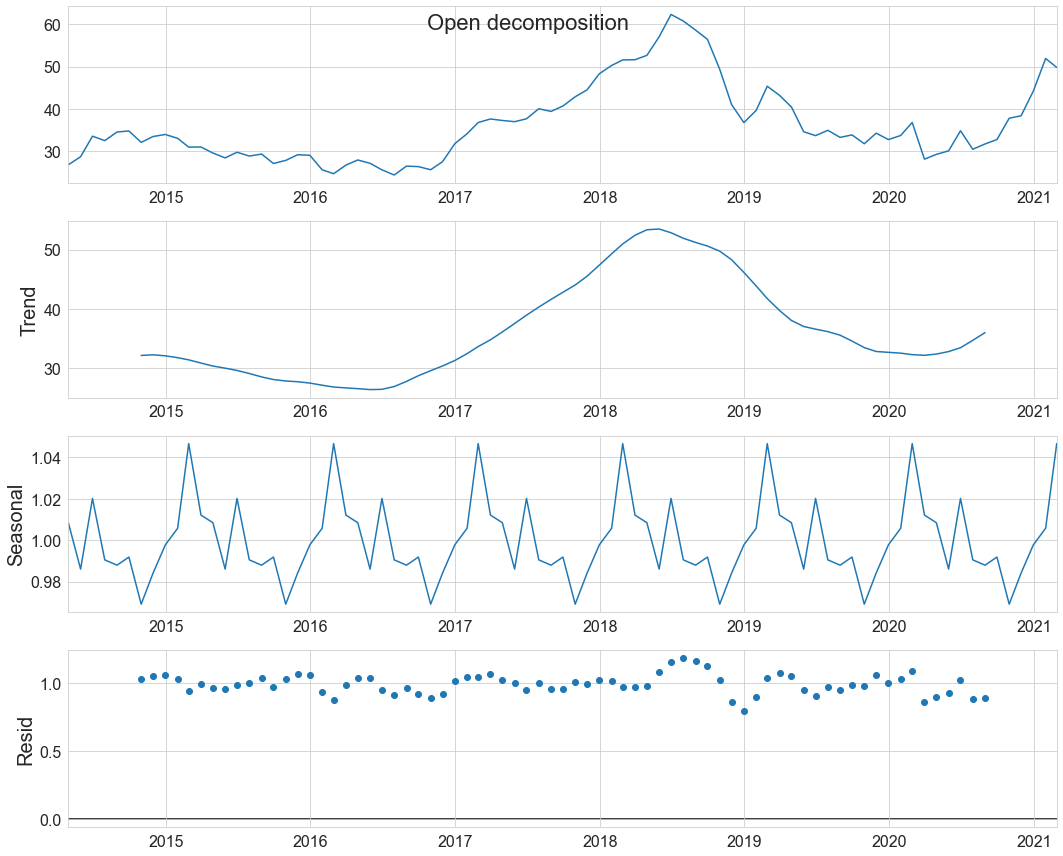

In [206]:
# Aggregating the Time Series to a monthly scaled index
y = df[['Date','Open']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# Setting rcparams
mpl.rcParams['figure.figsize'] = 15, 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16

# Using statistical tools of statsmodel library
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomp = decomposition.plot()
decomp.suptitle('Open decomposition', fontsize=22)

The three components are shown separately in the bottom three panels. These component can be multiplied together to reconstruct the data shown in the top panel.

5. Stationarity

In [207]:
#check for stationary using Augmented Dickey Fuller test (ADF Test)
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print('Augmented Dickey-Fuller Test: {}'.format(title))
    # .dropna() handles differenced data
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val

    # .to_string() removes the line "dtype: float64"
    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

# Aggregating the Time Series to a monthly scaled index
y = df[['Date','Open']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

adf_test(y['Open'],title='')

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.733075
p-value                  0.414157
# lags used              1.000000
# observations          81.000000
critical value (1%)     -3.513790
critical value (5%)     -2.897943
critical value (10%)    -2.586191
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


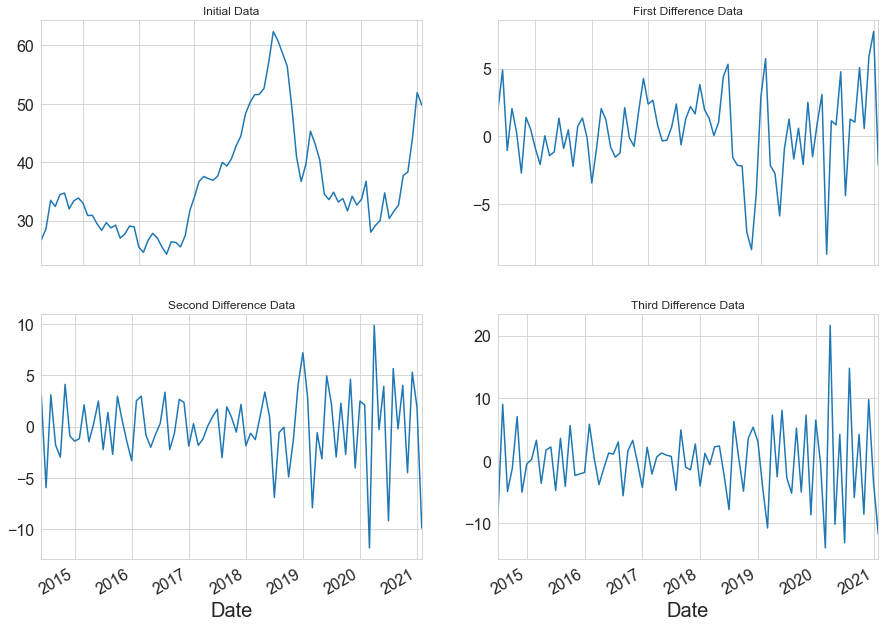

In [208]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15, 11))

y['OpenDiff1'] = diff(y['Open'],k_diff=1)
y['OpenDiff2'] = diff(y['Open'],k_diff=2)
y['OpenDiff3'] = diff(y['Open'],k_diff=3)

y['Open'].plot(title="Initial Data",ax=ax[0][0]).autoscale(axis='x',tight=True);
y['OpenDiff1'].plot(title="First Difference Data",ax=ax[0][1]).autoscale(axis='x',tight=True);
y['OpenDiff2'].plot(title="Second Difference Data",ax=ax[1][0]).autoscale(axis='x',tight=True);
y['OpenDiff3'].plot(title="Third Difference Data",ax=ax[1][1]).autoscale(axis='x',tight=True);

fig.autofmt_xdate()

6. Autocorrelation

[1.         0.99546267 0.99113658 0.9867631  0.98202591 0.97716903
 0.97208334 0.96731834 0.96229537 0.95696871 0.95155838 0.94647931
 0.94159904 0.9368732  0.93222036 0.92768621 0.923011   0.91805155
 0.91370166 0.90923254 0.90487203 0.90058428 0.89660062 0.89237038
 0.88831181 0.88413351 0.88016994 0.87628699 0.87239132 0.86903133
 0.8656778  0.86203827 0.85861099 0.85526323 0.85213746 0.84887931
 0.84537824 0.84155538 0.83796242 0.8343985  0.83090996 0.82757541
 0.82403642 0.82022912 0.81656915 0.8128343  0.80927948 0.80591815
 0.8027315  0.79944986 0.79586102 0.79216102 0.78853276 0.78502135
 0.7814506  0.77783611 0.77446636 0.77102522 0.76753348 0.76398704
 0.76086966]


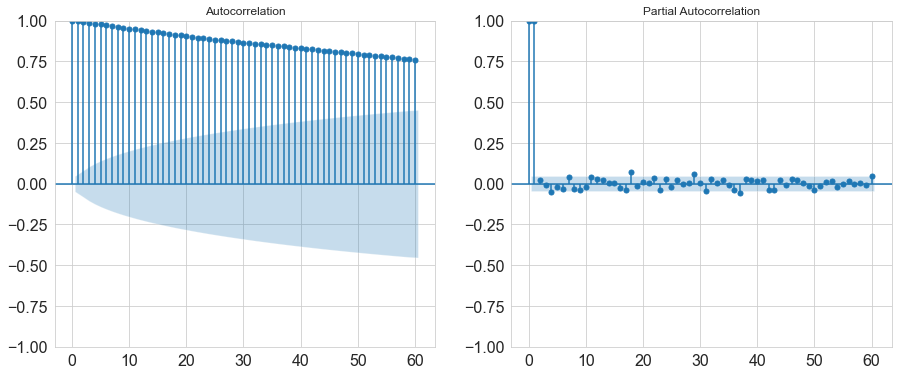

In [209]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
autocorr = acf(df['Open'], nlags=60, fft=False)
print(autocorr)

plot_acf(df['Open'].tolist(), lags=60, ax=ax[0], fft=False);
plot_pacf(df['Open'].tolist(), lags=60, ax=ax[1]);

7. Lag Scatter Plot

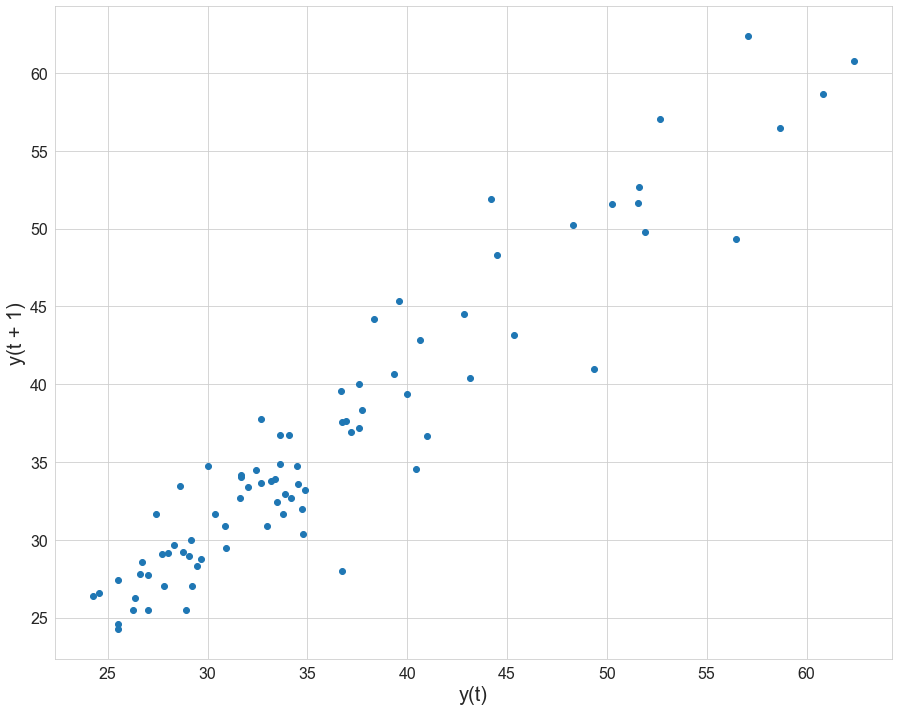

In [210]:
lag_plot(y['Open']);

We have a positive correlation relationship.

8. Moving Average (MA)

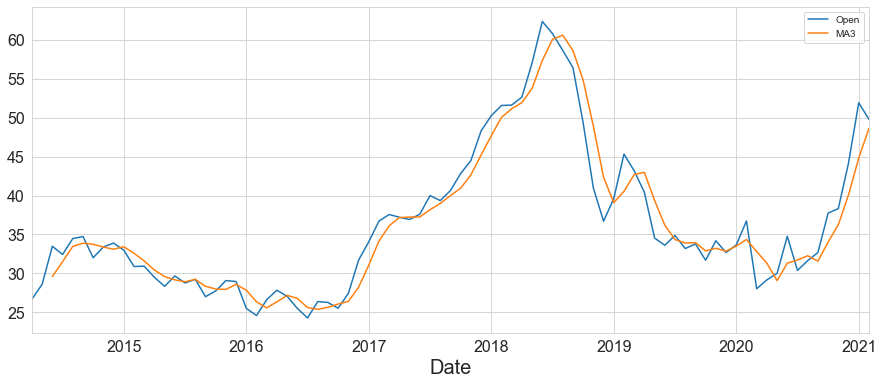

In [211]:
# Aggregating the Time Series to a monthly scaled index
y = df[['Date','Open']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

y['MA3'] = y.rolling(window=3).mean()
y.plot(figsize=(15,6));

9. Exponential Smoothing

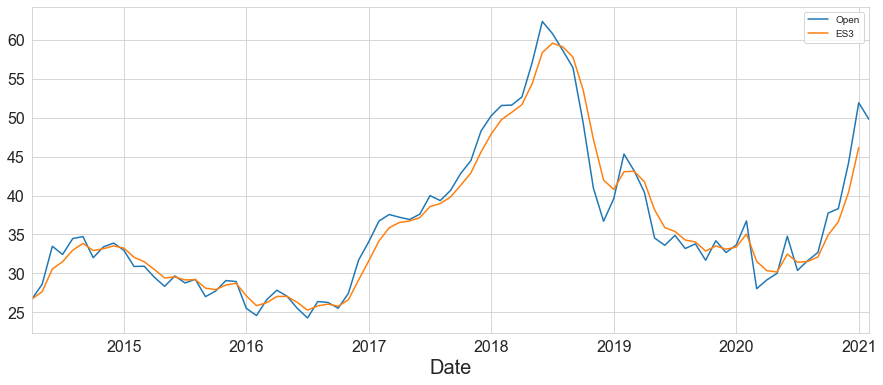

In [212]:
# Setting parameters value
span = 3
# Weights of observations
alpha = 2/(span+1)

# Plot Simple exponential smoothing
y['ES3'] = SimpleExpSmoothing(y['Open']).fit(smoothing_level = alpha, optimized = False).fittedvalues.shift(-1)
y[['Open','ES3']].plot(figsize=(15,6));

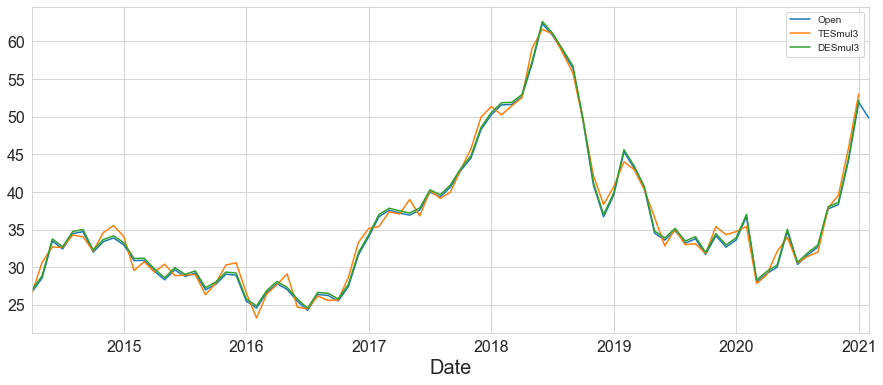

In [213]:
# Plot Double and Triple exponential smoothing
y['DESmul3'] = ExponentialSmoothing(y['Open'], trend = 'add').fit().fittedvalues.shift(-1)
y['TESmul3'] = ExponentialSmoothing(y['Open'], trend = 'add', seasonal = 'add', seasonal_periods = 12).fit().fittedvalues.shift(-1)
y[['Open', 'TESmul3', 'DESmul3']].plot(figsize = (15,6));

10. Forecasting with Auto ARIMA

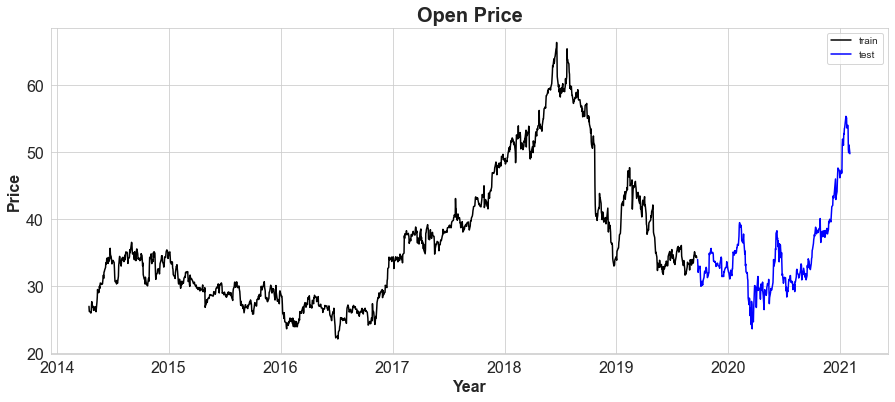

In [214]:
# Split data into train and validation set 80/20
df_train, df_test = df[:int(len(df)*0.8)], df[int(len(df)*0.8):]

# Index disappeared, put them back
df_test = df_test.set_index('Date', drop=False)
df_train = df_train.set_index('Date', drop=False)

# Line plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(df_train['Date'], df_train['Open'], color = 'black')
sns.lineplot(df_test['Date'], df_test['Open'], color = 'blue')

# Formatting
ax.set_title('Open Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

In [215]:
df_train

,CompanyName,StockName,High,Low,Open,Close,Volume,Date,Year,Month
Date,,,,,,,,,,
2014-04-16,LVMH,MC,27.219999,26.000000,27.000000,26.150000,4441800.0,2014-04-16,2014,4
2014-04-17,LVMH,MC,26.230000,25.959999,26.230000,26.090000,299300.0,2014-04-17,2014,4
2014-04-21,LVMH,MC,26.261000,25.750000,26.139999,25.950001,142400.0,2014-04-21,2014,4
2014-04-22,LVMH,MC,26.290001,25.870001,26.000000,26.250000,365700.0,2014-04-22,2014,4
2014-04-23,LVMH,MC,26.940001,25.900000,26.090000,26.879999,158800.0,2014-04-23,2014,4
...,...,...,...,...,...,...,...,...,...,...
2019-09-16,LVMH,MC,34.820000,34.200001,34.459999,34.400002,526000.0,2019-09-16,2019,9
2019-09-17,LVMH,MC,34.669998,33.560001,34.340000,34.599998,511400.0,2019-09-17,2019,9
2019-09-18,LVMH,MC,34.759998,34.080002,34.560001,34.610001,320600.0,2019-09-18,2019,9


In [216]:
df_test

,CompanyName,StockName,High,Low,Open,Close,Volume,Date,Year,Month
Date,,,,,,,,,,
2019-09-23,LVMH,MC,34.150002,32.490002,34.000000,33.150002,601900.0,2019-09-23,2019,9
2019-09-24,LVMH,MC,33.375000,31.969999,33.160000,32.070000,593100.0,2019-09-24,2019,9
2019-09-25,LVMH,MC,32.900002,32.070000,32.070000,32.709999,494300.0,2019-09-25,2019,9
2019-09-26,LVMH,MC,33.180000,32.544998,32.590000,32.650002,721100.0,2019-09-26,2019,9
2019-09-27,LVMH,MC,33.209999,32.255001,32.970001,32.560001,380200.0,2019-09-27,2019,9
...,...,...,...,...,...,...,...,...,...,...
2021-01-26,LVMH,MC,53.889999,51.279999,53.689999,51.450001,404700.0,2021-01-26,2021,1
2021-01-27,LVMH,MC,50.779999,48.759998,50.419998,49.369999,688200.0,2021-01-27,2021,1
2021-01-28,LVMH,MC,51.820000,49.639999,49.930000,51.189999,480400.0,2021-01-28,2021,1


In [217]:
%%time
model_autoARIMA = auto_arima(df_train['Open'],
                             start_p = 0,
                             start_q = 0,
                             test = 'adf', # use adftest to find optimal 'd'
                             max_p = 5,
                             max_q = 5, # maximum p and q
                             m = 12, # frequency of series
                             seasonal = False,
                             start_P = 0,
                             D = 0,
                             trace = True,
                             error_action = 'ignore')
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2978.093, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2979.118, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2979.149, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2976.167, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2981.065, Time=0.65 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.400 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1368
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1487.084
Date:                Sun, 26 Feb 2023   AIC                           2976.167
Time:                        16:15:07   BIC                           2981.388
Sample:                             0   HQIC                          2978.121
                               - 1368                                       

In [218]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train['Open'], order = (0, 1, 0))
# disp=-1: no output
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1368
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1487.084
Date:                Sun, 26 Feb 2023   AIC                           2976.167
Time:                        16:15:07   BIC                           2981.388
Sample:                             0   HQIC                          2978.121
                               - 1368                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.5157      0.009     57.247      0.000       0.498       0.533
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):              3426.64
Prob(Q):                              0.32   Pr

In [219]:
result = fitted.forecast(343, alpha=0.05)

In [220]:
result = tuple(result)
type(result)

tuple

In [221]:
result

(34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25999832,
 34.25

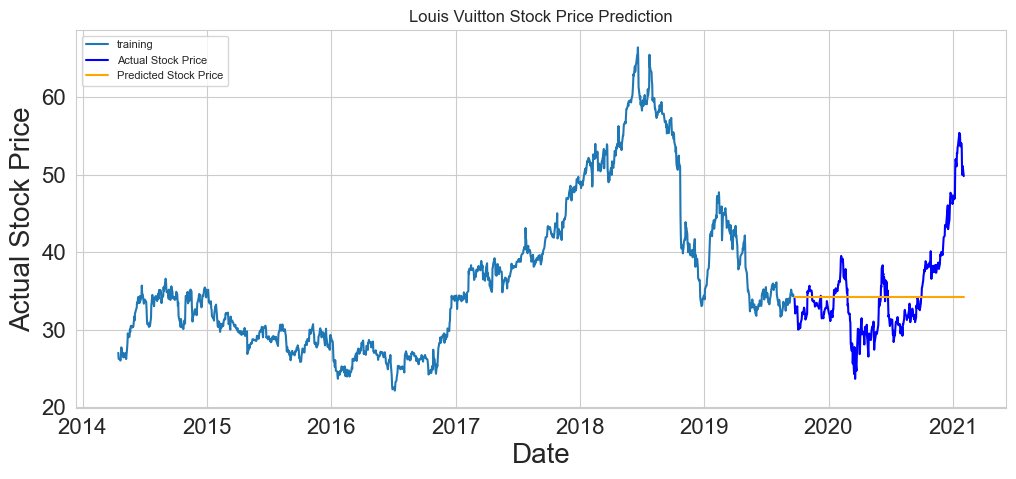

In [222]:
# Forecast 343 next observations
fc = result  # 95% confidence
fc_series = pd.Series(fc, index=df_test.index)
#lower_series = pd.Series(conf[:, 0], index=df_test.index)
#upper_series = pd.Series(conf[:, 1], index=df_test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train['Open'], label='training')
plt.plot(df_test['Open'], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
#plt.fill_between(lower_series.index, lower_series, upper_series,
                 #color='k', alpha=.10)
plt.title('Louis Vuitton Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [223]:
import math

In [224]:
# Report performance
mse = mean_squared_error(df_test['Open'], fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(df_test['Open'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(df_test['Open'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - df_test['Open'])/np.abs(df_test['Open']))
print('MAPE: '+str(mape))

MSE: 36.23645703353826
MAE: 4.317346617259476
RMSE: 6.01967250218301
MAPE: 0.11816999462324704
